<a href="https://colab.research.google.com/github/lake1995-2019/open_my/blob/master/deeplab_keras_my.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#####################3
#start

In [0]:
#download project from git hub 
!git clone https://github.com/Golbstein/Keras-segmentation-deeplab-v3.1

Cloning into 'Keras-segmentation-deeplab-v3.1'...
remote: Enumerating objects: 13, done.
remote: Counting objects: 100% (13/13), done.
remote: Compressing objects: 100% (13/13), done.
remote: Total 266 (delta 6), reused 0 (delta 0), pack-reused 253
Receiving objects: 100% (266/266), 21.08 MiB | 32.17 MiB/s, done.
Resolving deltas: 100% (133/133), done.


In [0]:
ls

deeplabv3p.py  README.md           Untitled1.ipynb  VOCtrainval_11-May-2012/
examples/      segmentation.ipynb  Untitled.ipynb   weights/
__pycache__/   subpixel.py         utils.py


In [0]:
cd Keras-segmentation-deeplab-v3.1-master/

/content/Keras-segmentation-deeplab-v3.1-master


In [1]:
pwd

'/content'

In [0]:
from google.colab import files
files.upload()

Saving utils.py to utils.py


{'utils.py': b'from __future__ import print_function\nimport warnings\nimport matplotlib.pyplot as plt\nwarnings.filterwarnings("ignore")\nimport numpy as np\nfrom deeplabv3p import Deeplabv3\nimport os\nimport multiprocessing\nworkers = multiprocessing.cpu_count()//2\nimport keras\nimport keras.backend as K\nfrom keras.utils.data_utils import Sequence\nimport tensorflow as tf\nfrom keras.optimizers import Adam, SGD, RMSprop\nfrom keras.callbacks import ModelCheckpoint, ReduceLROnPlateau, EarlyStopping, LambdaCallback\nfrom keras.layers import *\nfrom subpixel import *\nfrom keras.models import Model, Sequential\nfrom keras.callbacks import TensorBoard\nfrom collections import Counter\nfrom keras.preprocessing.image import ImageDataGenerator\nfrom tensorflow.python.client import device_lib\nfrom keras.regularizers import l2\nfrom keras.utils import to_categorical\nfrom keras.applications import imagenet_utils\nfrom sklearn.utils import class_weight\nimport cv2\nimport glob\nimport rand

In [0]:
cd Keras-segmentation-deeplab-v3.1-master/

/content/Keras-segmentation-deeplab-v3.1-master


LocalからProjectをアップロード

In [0]:
!pip install PyDrive googledrivedownloader
from google_drive_downloader import GoogleDriveDownloader
GoogleDriveDownloader.download_file_from_google_drive(file_id="1t2BiFoZ8izmV6mFmFg-0WTcUG5Mk2Kry",dest_path="./tmp.zip",unzip=True)
!rm tmp.zip
!ls


     |████████████████████████████████| 993kB 2.8MB/s 
  Created wheel for PyDrive: filename=PyDrive-1.3.1-cp36-none-any.whl size=27435 sha256=8c8670a80ee2c5d94fb45ac6da7cd2332871bf5ea467123ae36403072c56c6d9
  Stored in directory: /root/.cache/pip/wheels/fa/d2/9a/d3b6b506c2da98289e5d417215ce34b696db856643bad779f4
Successfully built PyDrive
Unzipping...Done.
Keras-segmentation-deeplab-v3.1-master	sample_data


In [0]:
!pip install git+https://github.com/lucasb-eyer/pydensecrf.git

  Cloning https://github.com/lucasb-eyer/pydensecrf.git to /tmp/pip-req-build-f1nb9qzz
  Running command git clone -q https://github.com/lucasb-eyer/pydensecrf.git /tmp/pip-req-build-f1nb9qzz
  Created wheel for pydensecrf: filename=pydensecrf-1.0rc2-cp36-cp36m-linux_x86_64.whl size=2235030 sha256=afc299d95ac3a015dabd55888b6727d5d0984a1ec2806b80c49a164f9eab7f25
  Stored in directory: /tmp/pip-ephem-wheel-cache-_j38204g/wheels/81/ac/ed/09f1890b954ca1ff7f189518cc9a319138e50e7ea88937fae9
Successfully built pydensecrf


In [0]:
!apt-get remove cython

Reading package lists... Done
Building dependency tree       
Reading state information... Done
Package 'cython' is not installed, so not removed
0 upgraded, 0 newly installed, 0 to remove and 8 not upgraded.


In [0]:
!pip install -U cython

Requirement already up-to-date: cython in /usr/local/lib/python3.6/dist-packages (0.29.13)


In [0]:
cd Keras-segmentation-deeplab-v3.1-master/

/content/Keras-segmentation-deeplab-v3.1-master


In [0]:
%matplotlib inline
import matplotlib.pyplot as plt
from utils import *

from keras.optimizers import Adam,Adamax
from keras.utils import plot_model

image_size = (512, 512) #(512,512) (720, 1280)
bs =4

better_model = False
#load_pretrained_weights = True
load_pretrained_weights = False
my_modelpath="/content/drive/My Drive/li/logs/loss0.960-val_Jaccard0.392.h5"

losses = sparse_crossentropy_ignoring_last_label
metrics = {'pred_mask' : [Jaccard, sparse_accuracy_ignoring_last_label]}

backbone = 'mobilenetv2' #mobilenetv2, xception

NET = 'deeplab_' + backbone
#PATH = '/workspace/datasets/OpenSourceDatasets/VOCdevkit/VOC2012/'

PATH = '/content/Keras-segmentation-deeplab-v3.1-master/VOCtrainval_11-May-2012/VOCdevkit/VOC2012/'

save_path="/content/drive/My Drive/li/logs/"

n_classes = len(get_VOC2012_classes()) - 1

print('Num workers:', workers)
print('Backbone:', backbone)
print('Path to dataset:', PATH)
print('N classes:', n_classes)
print('Image size:', image_size)
print('Batch size:', bs)


SegClass = SegModel(PATH, image_size)
SegClass.set_batch_size(bs)

Num workers: 1
Backbone: mobilenetv2
Path to dataset: /content/Keras-segmentation-deeplab-v3.1-master/VOCtrainval_11-May-2012/VOCdevkit/VOC2012/
N classes: 21
Image size: (512, 512)
Batch size: 4


In [0]:
if better_model:
    model = SegClass.create_seg_model(net='subpixel',n=n_classes, load_weights=load_pretrained_weights, 
                                      multi_gpu=False, backbone=backbone)
else:
    model = SegClass.create_seg_model(net='original',n=n_classes, load_weights=load_pretrained_weights, 
                                      multi_gpu=False, backbone=backbone,modelpath=my_modelpath)

#可視化
#model.summary()
plot_model(model, to_file='model.png',show_shapes=True,show_layer_names = True)

#org
#model.compile(optimizer = Adam(lr=7e-4, epsilon=1e-8, decay=1e-6), sample_weight_mode = "temporal",
 #             loss = losses, metrics = metrics) #decay=1e-6

#model.compile(optimizer = Adamax(lr=0.002, beta_1=0.9, beta_2=0.999,
 #                                      epsilon=1e-08, decay=1e-4), sample_weight_mode = "temporal",
  #            loss = losses, metrics = metrics)
  
model.compile(optimizer = Adamax(lr=0.002, beta_1=0.9, beta_2=0.999,
                                       epsilon=1e-08, decay=1e-4), sample_weight_mode = "temporal",
              loss = losses, metrics = metrics)

print('Weights path:', SegClass.modelpath)

sparse_crossentropy_ignoring_last_label 来た!!!!!!!!!!!!!!!
Jaccard 来た!!!!!!!!!!!!!!!
sparse_accuracy_ignoring_last_label 来た!!!!!!!!!!!!!!!
Weights path: /content/drive/My Drive/li/logs/loss0.960-val_Jaccard0.392.h5


In [0]:
train_generator = SegClass.create_generators(blur=5,crop_shape=None, mode='train', n_classes=n_classes,
                                             horizontal_flip=True, vertical_flip=False, brightness=0.3, 
                                             rotation=50., zoom=0.1, validation_split=.15, seed=7, do_ahisteq=False)
valid_generator = SegClass.create_generators(blur=0, crop_shape=None, mode='validation', 
                                             n_classes=n_classes, horizontal_flip=False, vertical_flip=False, 
                                             brightness=.1, rotation=False, zoom=False, validation_split=.15, 
                                             seed=7, do_ahisteq=False)

batch_size: 4
2913
2913
self.resize_shape: (512, 512)
batch_size: 4
2913
2913
self.resize_shape: (512, 512)


In [0]:
monitor = 'Jaccard'
mode = 'max'

# fine-tune model (train only last conv layers)
"""
if load_pretrained_weights:
    flag = 0
    for k, l in enumerate(model.layers):
      l.trainable = False
      if l.name == 'concat_projection':
          flag = 1
      if flag:
          l.trainable = True
"""
        
def build_callbacks(tf_board = False):
    tensorboard = TensorBoard(log_dir='./logs/'+SegClass.net, histogram_freq=0,
                        write_graph=False, write_images = False)
    
    """
    #org
    checkpointer = ModelCheckpoint(filepath = SegClass.modelpath, verbose=1, save_best_only=True, save_weights_only=True,
                                    monitor = 'val_{}'.format(monitor), mode = mode)    
    """
    
    checkpointer = ModelCheckpoint(filepath = save_path + 'loss{loss:.3f}-val_Jaccard{val_Jaccard:.3f}.h5',
                                   verbose=1, save_best_only=True, save_weights_only=True,
                                    monitor ='val_{}'.format(monitor), period=1)
    
    stop_train = EarlyStopping(monitor = 'val_{}'.format(monitor), patience=100, verbose=1, mode = mode)
    reduce_lr = ReduceLROnPlateau(monitor = 'val_{}'.format(monitor), factor=0.5,
                patience=5, min_lr=1e-6)
    if tf_board:
        callbacks = [reduce_lr, stop_train, tensorboard]
    else:
        callbacks = [checkpointer, reduce_lr, stop_train]
    return callbacks

callbacks = build_callbacks(tf_board = False)
        
SegClass.set_num_epochs(100)
history = SegClass.train_generator(model, train_generator, valid_generator, callbacks, mp = True)

Epoch 1/100
generate in_type: train
generate in_type: validation
619/619 [==============================] - 711s 1s/step - loss: 1.9437 - Jaccard: 0.1863 - sparse_accuracy_ignoring_last_label: 0.7109 - val_loss: 2.0300 - val_Jaccard: 0.1993 - val_sparse_accuracy_ignoring_last_label: 0.6129

Epoch 00001: val_Jaccard improved from -inf to 0.19928, saving model to /content/drive/My Drive/li/logs/loss1.944-val_Jaccard0.199.h5
Epoch 2/100
619/619 [==============================] - 694s 1s/step - loss: 1.7281 - Jaccard: 0.2231 - sparse_accuracy_ignoring_last_label: 0.7284 - val_loss: 2.7075 - val_Jaccard: 0.1742 - val_sparse_accuracy_ignoring_last_label: 0.7053

Epoch 00002: val_Jaccard did not improve from 0.19928
Epoch 3/100
619/619 [==============================] - 693s 1s/step - loss: 1.6940 - Jaccard: 0.2277 - sparse_accuracy_ignoring_last_label: 0.7274 - val_loss: 3.8325 - val_Jaccard: 0.1618 - val_sparse_accuracy_ignoring_last_label: 0.5473

Epoch 00003: val_Jaccard did not improve f

In [0]:
#save_path="/content/drive/My Drive/li/logs/"
# Load original deeplab and subpixel-deeplab
model1 = SegClass.create_seg_model(net='original',n=n_classes, load_weights=False, multi_gpu=False, backbone=backbone)
model1.load_weights('weights/mobilenetv2_original.h5')

model2 = SegClass.create_seg_model(net='subpixel',n=n_classes, load_weights=False, multi_gpu=False, backbone=backbone)
model2.load_weights('weights/mobilenetv2_subpixel.h5')
#model2 = SegClass.create_seg_model(net='original',n=n_classes, load_weights=False, multi_gpu=False, backbone=backbone)
#model2.load_weights(save_path+'loss0.327-val_loss1.476.h5')

model_my = SegClass.create_seg_model(net='original',n=n_classes, load_weights=False, multi_gpu=False, backbone=backbone)
model_my.load_weights(save_path+'loss0.960-val_Jaccard0.392.h5')

In [0]:
def mIOU(gt, preds):
    ulabels = np.unique(gt)
    iou = np.zeros(len(ulabels))
    for k, u in enumerate(ulabels):
        inter = (gt == u) & (preds==u)
        union = (gt == u) | (preds==u)
        iou[k] = inter.sum()/union.sum()
    return np.round(iou.mean(), 2)

In [0]:
#i = np.random.randint(0, len(valid_generator))
#x,y,s = valid_generator.__getitem__(i)
rlt= next(valid_generator.generate("validation"))
print(len(rlt))
print(rlt[0].shape,rlt[1].shape)
x=rlt[0] #画像　バッチサイズ分
y=rlt[1] #教師　バッチサイズ分

generate in_type: validation
3
(4, 512, 512, 3) (4, 262144, 1)


In [0]:
#予測
p_rlt1=model1.predict(x)
p_rlt2=model2.predict(x)
p_rlt3=model_my.predict(x)

[ 0  6  7 15 21]


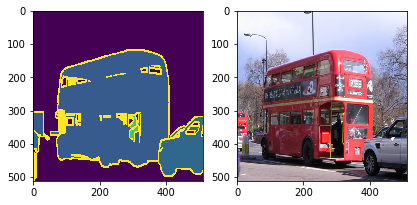

In [0]:
#表示画像を指定 バッチから一つ
idx=3

plt.figure(figsize=(14,10))
plt.subplot(141)
#plt.imshow(x[0].astype('uint8'))
plt.imshow(y[idx].reshape(image_size))
plt.subplot(142)
plt.imshow(x[idx])

print(np.unique(y[idx]))

[0.00059352 0.00050953 0.00043742 ... 0.00276523 0.00276523 0.00276523]
(4, 262144, 21)
[2.2054522e-10 2.4824259e-10 2.7941785e-10 ... 9.3664835e-07 9.3664835e-07
 9.3664835e-07]
(512, 512)
(512, 512)
(512, 512)


Text(0.5, 1.0, 'My Original + CRF\nmIOU: 0.29')

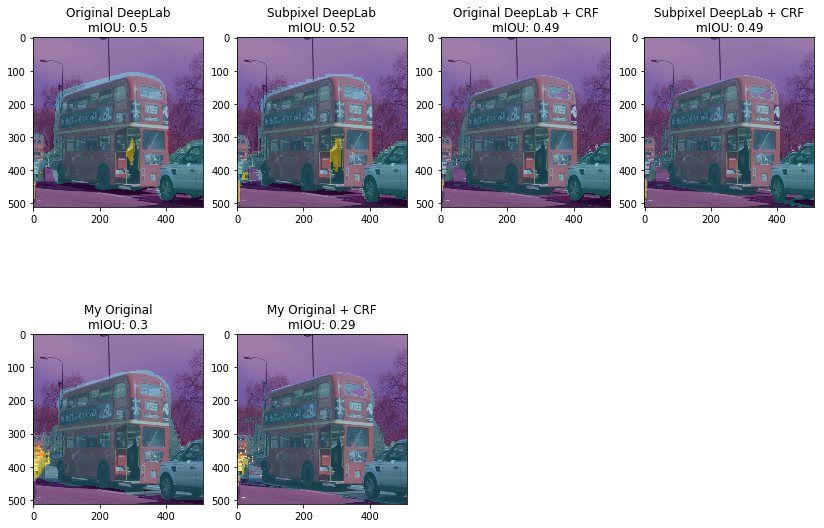

In [0]:
#p_rlt1=model1.predict(x)
#print(p_rlt1.shape)

print(p_rlt1[0,:,2])

#print(len(set(p_rlt1.flat)))
#print(set(p_rlt1.flat))

#p_rlt2=model2.predict(x)
#print(p_rlt2.shape)

############################
#p_rlt3=model_my.predict(x)
print(p_rlt3.shape)
print(p_rlt3[0,:,2])
############################

preds1 = np.argmax(p_rlt1[idx], -1).reshape(image_size)
preds2 = np.argmax(p_rlt2[idx], -1).reshape(image_size)

preds3 = np.argmax(p_rlt3[idx], -1).reshape(image_size)

print(preds1.shape)
print(preds2.shape)
print(preds3.shape)


im = x[idx].astype('uint8')
gt = y[idx].reshape(image_size).astype('int32')

plt.figure(figsize=(14,10))
plt.subplot(241)
plt.imshow(im)
plt.imshow(preds1, alpha=.5)
plt.title('Original DeepLab\nmIOU: '+str(mIOU(gt, preds1)))
plt.subplot(242)
plt.imshow(im)
plt.imshow(preds2, alpha=.5)
plt.title('Subpixel DeepLab\nmIOU: '+str(mIOU(gt, preds2)))
plt.subplot(243)
MAP = do_crf(im, preds1, zero_unsure=False)
plt.imshow(im)
plt.imshow(MAP, alpha=.5)
plt.title('Original DeepLab + CRF\nmIOU: '+str(mIOU(gt, MAP)))
plt.subplot(244)
MAP = do_crf(im, preds2, zero_unsure=False)
plt.imshow(im)
plt.imshow(MAP, alpha=.5)
plt.title('Subpixel DeepLab + CRF\nmIOU: '+str(mIOU(gt, MAP)))
###############################################

plt.subplot(245)
plt.imshow(im)
plt.imshow(preds3, alpha=.5)
plt.title('My Original\nmIOU: '+str(mIOU(gt, preds3)))
plt.subplot(246)
MAP = do_crf(im, preds3, zero_unsure=False)
plt.imshow(im)
plt.imshow(MAP, alpha=.5)
plt.title('My Original + CRF\nmIOU: '+str(mIOU(gt, MAP)))



正解： [ 0  6  7 15 21]
preds1: {0, 7, 6, 15}
4
preds3: {0, 15, 6, 7}
4


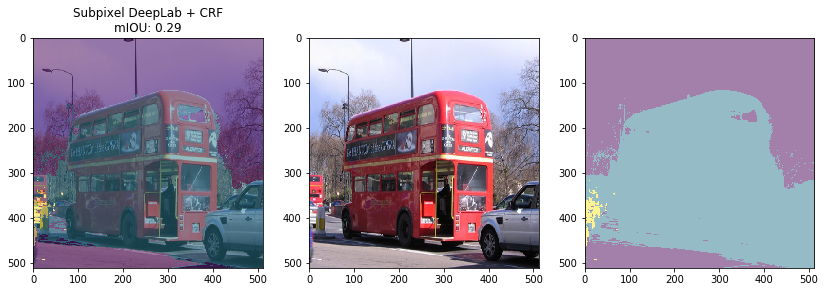

In [0]:
print("正解：",np.unique(y[idx]))
n_labels = len(set(preds1.flat))
#print(preds1)
print("preds1:",set(preds1.flat))
print(n_labels)

n_labels = len(set(preds3.flat))
#print(preds3)
print("preds3:",set(preds3.flat))
print(n_labels)

plt.figure(figsize=(14,10))
plt.subplot(131)
MAP = do_crf(im, preds3, zero_unsure=False)
plt.imshow(x[idx].astype('uint8'))
plt.imshow(MAP, alpha=.5)
plt.title('Subpixel DeepLab + CRF\nmIOU: '+str(mIOU(gt, MAP)))
plt.subplot(132)
plt.imshow(x[idx].astype('uint8'))
plt.subplot(133)
plt.imshow(MAP, alpha=.5)

##########################################
#以上
##########################################

In [0]:
!wget   https://github.com/tensorflow/models/archive/master.zip

In [0]:
!unzip master.zip

Archive:  master.zip
b7c8dab76abb54d721b5f9877637523f3047439f
   creating: models-master/
  inflating: models-master/.gitignore  
  inflating: models-master/.gitmodules  
  inflating: models-master/AUTHORS   
  inflating: models-master/CODEOWNERS  
  inflating: models-master/CONTRIBUTING.md  
  inflating: models-master/ISSUE_TEMPLATE.md  
  inflating: models-master/LICENSE   
  inflating: models-master/README.md  
 extracting: models-master/WORKSPACE  
   creating: models-master/official/
 extracting: models-master/official/.gitignore  
  inflating: models-master/official/Dockerfile.cpu  
  inflating: models-master/official/Dockerfile.gpu  
  inflating: models-master/official/LICENSE  
  inflating: models-master/official/README.md  
 extracting: models-master/official/__init__.py  
   creating: models-master/official/benchmark/
 extracting: models-master/official/benchmark/__init__.py  
  inflating: models-master/official/benchmark/benchmark_uploader.py  
  inflating: models-master/off

In [0]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
cd models-master/research/

[Errno 2] No such file or directory: 'models-master/research/'
/content


In [0]:
import sys,os

cur_dir = os.getcwd()
sys.path.append(cur_dir + "/slim")

In [0]:
cd deeplab

/content/models-master/research/deeplab


In [0]:
!python model_test.py

Traceback (most recent call last):
  File "model_test.py", line 20, in <module>
    from deeplab import common
ModuleNotFoundError: No module named 'deeplab'


In [0]:
cd datasets/

/content/models-master/research/deeplab/datasets


In [0]:
!sh download_and_convert_voc2012.sh 

--2019-08-14 02:42:55--  http://host.robots.ox.ac.uk/pascal/VOC/voc2012//VOCtrainval_11-May-2012.tar
Resolving host.robots.ox.ac.uk (host.robots.ox.ac.uk)... 129.67.94.152
Connecting to host.robots.ox.ac.uk (host.robots.ox.ac.uk)|129.67.94.152|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1999639040 (1.9G) [application/x-tar]
Saving to: ‘VOCtrainval_11-May-2012.tar’

VOCtrainval_11-May- 100%[===================>]   1.86G  12.2MB/s    in 2m 35s  

2019-08-14 02:45:30 (12.3 MB/s) - ‘VOCtrainval_11-May-2012.tar’ saved [1999639040/1999639040]

Uncompressing VOCtrainval_11-May-2012.tar
Removing the color map in ground truth annotations...
W0814 02:45:40.833132 140304718980992 deprecation_wrapper.py:119] From ./remove_gt_colormap.py:83: The name tf.app.run is deprecated. Please use tf.compat.v1.app.run instead.

W0814 02:45:40.833655 140304718980992 deprecation_wrapper.py:119] From ./remove_gt_colormap.py:68: The name tf.gfile.IsDirectory is deprecated. Please use 

In [0]:
!python deeplab/train.py \
  --logtostderr \
  --vis_split="train" \
  --model_variant="xception_65" \
  --atrous_rates=6 \
  --atrous_rates=12 \
  --atrous_rates=18 \
  --output_stride=16 \
  --decoder_output_stride=4 \
  --train_crop_size=513 \
  --train_crop_size=513 \
  --train_batch_size=64 \
  --fine_tune_batch_norm=false \
  --tf_initial_checkpoint="./data/init_models/deeplabv3_pascal_train_aug\model.ckpt" \
  --initialize_last_layer=false \
  --last_layers_contain_logits_only=true \
  --train_logdir="./data/log/train" \
  --dataset_dir="./data/tfrecord" \
  --dataset="pascal_voc_seg"

Traceback (most recent call last):
  File "deeplab/train.py", line 23, in <module>
    from deeplab import common
ModuleNotFoundError: No module named 'deeplab'


In [0]:
!export PYTHONPATH=$PYTHONPATH:`pwd`:`pwd`/slim

In [0]:
!export PYTHONPATH=$PYTHONPATH:`pwd`:`pwd`/slim